In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


In [2]:
data = pd.read_csv("Assignment 2.csv")
data.head()

,id,lat,lng
0,vipin-kumar-2,28.309124,76.864332
1,daya-,28.490826,77.069009
2,mukesh-3,28.501504,77.032206
3,neyaz-ahmed,28.512438,77.022588
4,pawan-kumar-2,28.532572,77.053045


In [4]:
data.shape

(21451, 3)

In [7]:
df = data["id"].dropna(axis=0)

In [14]:
df.shape

(21438,)

In [15]:
df.isnull().sum()

0

In [17]:
data.isnull().sum()

id       13
lat    5932
lng    5932
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21451 entries, 0 to 21450
Data columns (total 3 columns):
id     21438 non-null object
lat    15519 non-null float64
lng    15519 non-null float64
dtypes: float64(2), object(1)
memory usage: 502.8+ KB


In [20]:
#Dropping the null Values

df1 = data.dropna(axis=0)

In [21]:
df1.shape

(15519, 3)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15519 entries, 0 to 21450
Data columns (total 3 columns):
id     15519 non-null object
lat    15519 non-null float64
lng    15519 non-null float64
dtypes: float64(2), object(1)
memory usage: 485.0+ KB


In [24]:
X=df1.iloc[:,[1,2]].values
X

array([[28.3091245, 76.8643323],
       [28.4908258, 77.0690091],
       [28.5015038, 77.0322061],
       ...,
       [28.4554726, 77.0219019],
       [28.6304155, 77.0414625],
       [28.693554 , 77.255518 ]])

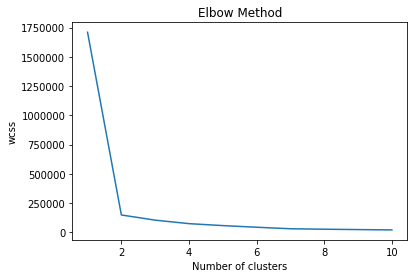

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [30]:
## FITTING KMEANS TO THE DATASET WITH K=4

km4 = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

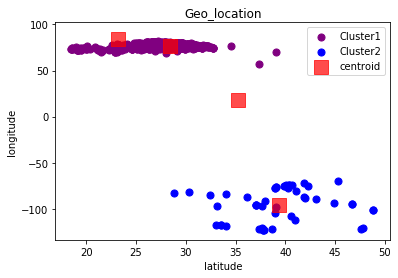

In [31]:
# Visualizing the clusters for k = 4

plt.scatter(X[y_means==0,0], X[y_means==0,1], s=50, c='purple', label="Cluster1")

plt.scatter(X[y_means==1,0], X[y_means==1,1], s=50, c='blue', label="Cluster2")

#plt.scatter(X[y_means==2,0], X[y_means==2,1], s=50, c='green', label="Cluster3")


plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], s=200,marker='s',c = 'red', alpha=0.7, label = 'centroid')
plt.title('Geo_location')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()

In [32]:
## FITTING KMEANS TO THE DATASET WITH K=6

km4 = KMeans(n_clusters = 6, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

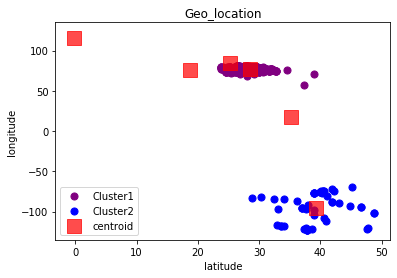

In [35]:
# Visualizing the clusters for k = 6

plt.scatter(X[y_means==0,0], X[y_means==0,1], s=50, c='purple', label="Cluster1")

plt.scatter(X[y_means==1,0], X[y_means==1,1], s=50, c='blue', label="Cluster2")

#plt.scatter(X[y_means==2,0], X[y_means==2,1], s=50, c='green', label="Cluster3")


plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], s=200,marker='s',c = 'red', alpha=0.7, label = 'centroid')
plt.title('Geo_location')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()